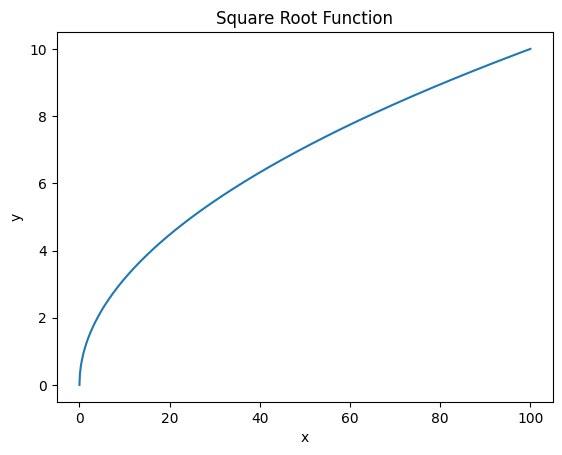

In [51]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 1000)
y = np.sqrt(x)

plt.plot(x, y, label='y = sqrt(x)')
plt.title('Square Root Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Init Quadratic Architecture

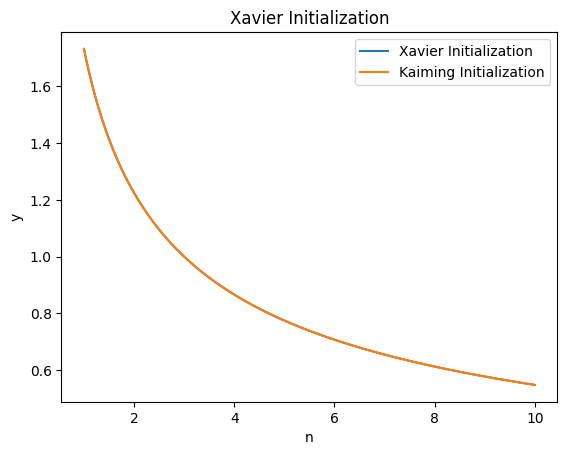

In [52]:

#n = np.array([*range(1, 10)])
n = np.linspace(1, 10, 1000)

y_xavier = np.sqrt(6/(n+n))
y_kaiming_in = np.sqrt(3/(n))

plt.plot(n, y_xavier, label='Xavier Initialization')
plt.plot(n, y_kaiming_in, label='Kaiming Initialization')
plt.title('Xavier Initialization')
plt.xlabel('n')
plt.ylabel('y')
plt.legend()
plt.show()

# Init Decreasing Architecture

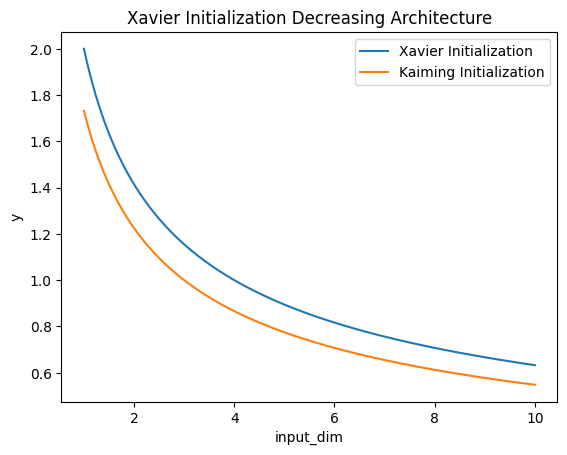

In [53]:

#n = np.array([*range(1, 10)])
input_dim = np.linspace(1, 10, 1000)
decrease_factor = 0.5
output_dim = input_dim * decrease_factor

y_xavier = np.sqrt(6/(input_dim+output_dim))
y_kaiming_in = np.sqrt(3/(input_dim))

plt.plot(input_dim, y_xavier, label='Xavier Initialization')
plt.plot(input_dim, y_kaiming_in, label='Kaiming Initialization')
plt.title('Xavier Initialization Decreasing Architecture')
plt.xlabel('input_dim')
plt.ylabel('y')
plt.legend()
plt.show()

# Init Increasing Architecture

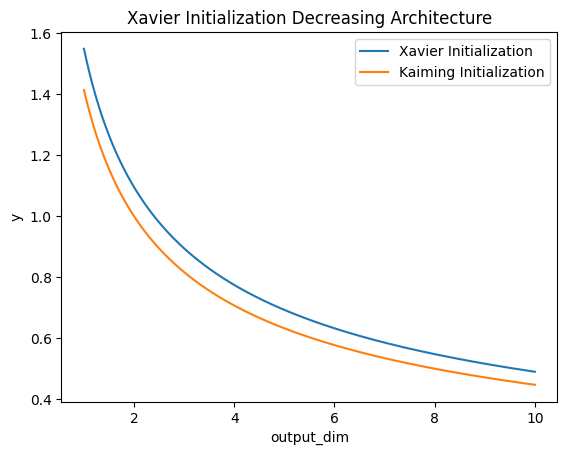

In [54]:

#n = np.array([*range(1, 10)])
output_dim = np.linspace(1, 10, 1000)
increase_factor = 1.5
input_dim = output_dim * increase_factor

y_xavier = np.sqrt(6/(input_dim+output_dim))
y_kaiming_in = np.sqrt(3/(input_dim))

plt.plot(output_dim, y_xavier, label='Xavier Initialization')
plt.plot(output_dim, y_kaiming_in, label='Kaiming Initialization')
plt.title('Xavier Initialization Decreasing Architecture')
plt.xlabel('output_dim')
plt.ylabel('y')
plt.legend()
plt.show()

Since we sum up between layers we might still undergo the central limit theorem.
We should make sure that our activations do not exceed the initial grid definition of -1 and 1.
With the current xavier_torch implementation and a width of 15 it can occur that the summed up activations get bigger in later layers.
http://127.0.0.1:5010/#/experiments/754124909483227637/runs/29944714a01d409f9e0930383441c4fd/artifacts 


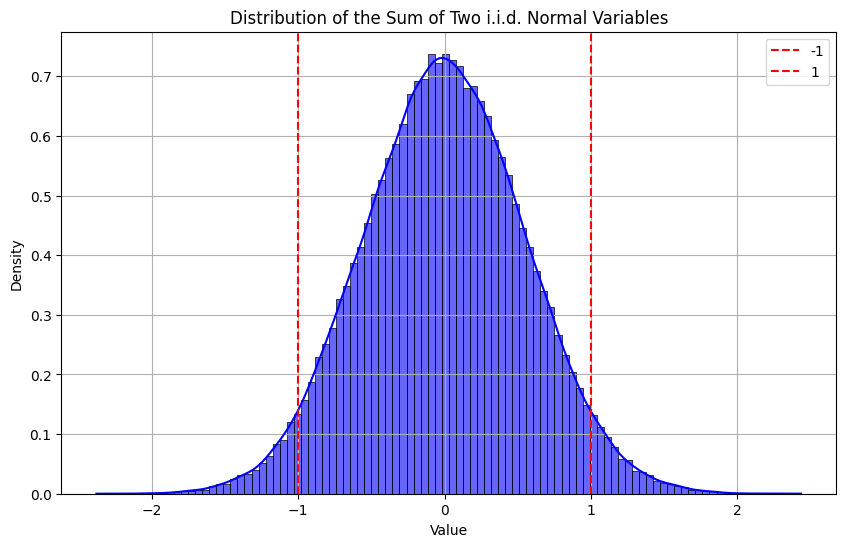

Proportion of sums within the range -1 to 1: 0.9318


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters for the normal distributions
mu = 0  # Mean
sigma = 0.388  # Standard deviation

# Generate samples from the two normal distributions
n_samples = 100000  # Number of samples
X1 = np.random.normal(mu, sigma, n_samples)
X2 = np.random.normal(mu, sigma, n_samples)

# Calculate the sum of the two distributions
S = X1 + X2

# Plot the histogram of the sum
plt.figure(figsize=(10, 6))
sns.histplot(S, bins=100, kde=True, stat="density", color='blue', alpha=0.6)
plt.title('Distribution of the Sum of Two i.i.d. Normal Variables')
plt.xlabel('Value')
plt.ylabel('Density')

# Add lines for the -1 and 1 boundaries
plt.axvline(-1, color='red', linestyle='--', label='-1')
plt.axvline(1, color='red', linestyle='--', label='1')
plt.legend()
plt.grid()
plt.show()

# Check the proportion of sums within the range -1 to 1
proportion_within_range = np.mean((S > -1) & (S < 1))
print(f'Proportion of sums within the range -1 to 1: {proportion_within_range:.4f}')

Proportion of sums within the range -1 to 1: 0.9860


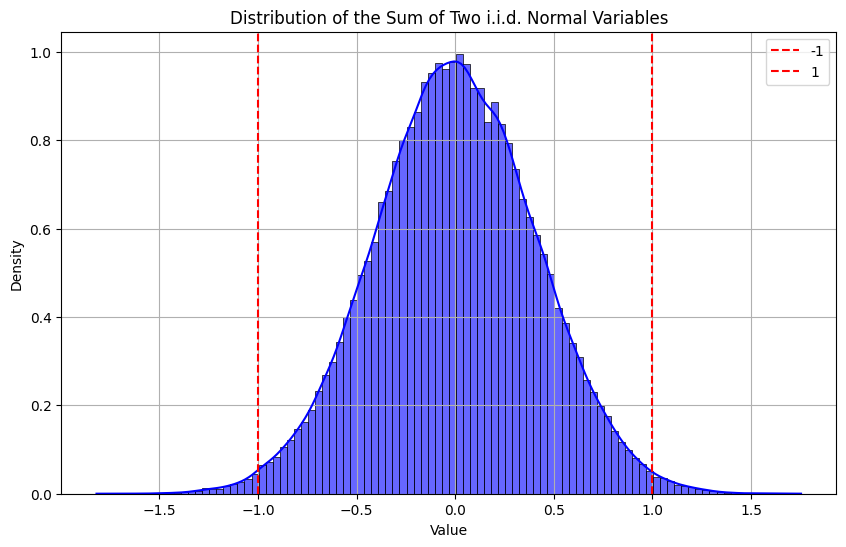

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def initialize_normal_distributions(confidence_level=0.99):
    # Set the parameters for the normal distributions
    mu = 0  # Mean

    # Calculate the z-score for the given confidence level
    alpha = 1 - confidence_level
    z_score = norm.ppf(1 - alpha / 2)  # Two-tailed

    # Calculate the standard deviation
    sigma = 2 / (z_score * np.sqrt(2))

    return mu, sigma

def generate_samples(mu, sigma, n_samples=100000):
    # Generate samples from the two normal distributions
    X1 = np.random.normal(mu, sigma, n_samples)
    X2 = np.random.normal(mu, sigma, n_samples)
    
    # Calculate the sum of the two distributions
    S = X1 + X2
    return S

def plot_distribution(S, lower_bound=-1, upper_bound=1):
    # Plot the histogram of the sum
    plt.figure(figsize=(10, 6))
    sns.histplot(S, bins=100, kde=True, stat="density", color='blue', alpha=0.6)
    plt.title('Distribution of the Sum of Two i.i.d. Normal Variables')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Add lines for the lower and upper boundaries
    plt.axvline(lower_bound, color='red', linestyle='--', label=str(lower_bound))
    plt.axvline(upper_bound, color='red', linestyle='--', label=str(upper_bound))
    plt.legend()
    plt.grid()
    plt.show()

def main(confidence_level=0.99):
    mu, sigma = initialize_normal_distributions(confidence_level)
    S = generate_samples(mu, sigma)
    
    # Calculate the proportion of sums within the specified range
    proportion_within_range = np.mean((S > -1) & (S < 1))
    print(f'Proportion of sums within the range -1 to 1: {proportion_within_range:.4f}')
    
    # Plot the distribution
    plot_distribution(S)

# Example usage
main(confidence_level=0.999999)  # You can change this value to any percentage (e.g., 0.95 for 95%)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def initialize_normal_distributions(target_proportion=0.99):
    # Set the parameters for the normal distributions
    mu = 0  # Mean

    # Calculate the z-score for the given target proportion
    alpha = 1 - target_proportion
    z_score = norm.ppf(1 - alpha / 2)  # Two-tailed

    # Calculate the standard deviation
    sigma = 2 / (z_score * np.sqrt(2))

    return mu, sigma

def generate_samples(mu, sigma, n_samples=100000):
    # Generate samples from the two normal distributions
    X1 = np.random.normal(mu, sigma, n_samples)
    X2 = np.random.normal(mu, sigma, n_samples)
    
    # Calculate the sum of the two distributions
    S = X1 + X2
    return S

def plot_distribution(S, lower_bound=-1, upper_bound=1):
    # Plot the histogram of the sum
    plt.figure(figsize=(10, 6))
    sns.histplot(S, bins=100, kde=True, stat="density", color='blue', alpha=0.6)
    plt.title('Distribution of the Sum of Two i.i.d. Normal Variables')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Add lines for the lower and upper boundaries
    plt.axvline(lower_bound, color='red', linestyle='--', label=str(lower_bound))
    plt.axvline(upper_bound, color='red', linestyle='--', label=str(upper_bound))
    plt.legend()
    plt.grid()
    plt.show()

def main(target_proportion=0.99):
    mu, sigma = initialize_normal_distributions(target_proportion)
    S = generate_samples(mu, sigma)
    
    # Calculate the proportion of sums within the specified range
    proportion_within_range = np.mean((S > -1) & (S < 1))
    print(f'Proportion of sums within the range -1 to 1: {proportion_within_range:.4f}')
    
    # Plot the distribution
    plot_distribution(S)

# Example usage
main(target_proportion=0.99)  # You can change this value to any proportion (e.g., 0.95 for 95%)

Target proportion: 0.9900
Proportion of sums within the range -1 to 1: 0.0000


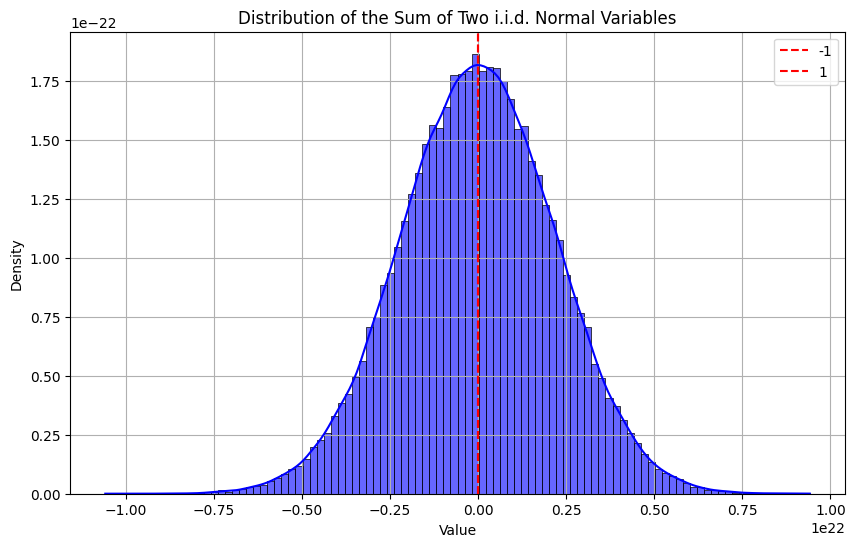

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def find_sigma_for_target_proportion(target_proportion, tolerance=0.001, max_iterations=1000):
    # Initial guess for sigma
    sigma = 1.0
    iteration = 0
    while iteration < max_iterations:
        # Calculate the z-score for the given target proportion
        alpha = 1 - target_proportion
        z_score = norm.ppf(1 - alpha / 2)  # Two-tailed

        # Calculate the current proportion of sums within the range -1 to 1
        lower_bound = -1
        upper_bound = 1
        current_proportion = 2 * norm.cdf(upper_bound / (np.sqrt(2) * sigma)) - 1

        # Check if the current proportion is within the tolerance
        if abs(current_proportion - target_proportion) < tolerance:
            break

        # Adjust sigma based on the difference
        if current_proportion < target_proportion:
            sigma *= 1.05  # Increase sigma
        else:
            sigma /= 1.05  # Decrease sigma

        iteration += 1

    return sigma

def generate_samples(mu, sigma, n_samples=100000):
    # Generate samples from the two normal distributions
    X1 = np.random.normal(mu, sigma, n_samples)
    X2 = np.random.normal(mu, sigma, n_samples)
    
    # Calculate the sum of the two distributions
    S = X1 + X2
    return S

def plot_distribution(S, lower_bound=-1, upper_bound=1):
    # Plot the histogram of the sum
    plt.figure(figsize=(10, 6))
    sns.histplot(S, bins=100, kde=True, stat="density", color='blue', alpha=0.6)
    plt.title('Distribution of the Sum of Two i.i.d. Normal Variables')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Add lines for the lower and upper boundaries
    plt.axvline(lower_bound, color='red', linestyle='--', label=str(lower_bound))
    plt.axvline(upper_bound, color='red', linestyle='--', label=str(upper_bound))
    plt.legend()
    plt.grid()
    plt.show()

def main(target_proportion=0.99):
    mu = 0  # Mean
    sigma = find_sigma_for_target_proportion(target_proportion)
    S = generate_samples(mu, sigma)
    
    # Calculate the proportion of sums within the specified range
    proportion_within_range = np.mean((S > -1) & (S < 1))
    print(f'Target proportion: {target_proportion:.4f}')
    print(f'Proportion of sums within the range -1 to 1: {proportion_within_range:.4f}')
    
    # Plot the distribution
    plot_distribution(S)

# Example usage
main(target_proportion=0.99)  # You can change this value to any proportion (e.g., 0.95 for 95%)